**Problem statement**

This analysis aims to understand factors contributing the mental health of a person.
The dataset measures mental health attitudes and frequency of mental health disorders in the tech workplace.
The project will systematically explore workplace mental health, starting with a comprehensive explanation of dataset and perform EDA.

In [221]:
# connecting to google drive
import os
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [222]:
#changing our current directory to mentalhealth where all our required files are stored
path = "/content/drive/MyDrive/MentalHealth"
os.chdir(path)

In [223]:
# checking for required files used for EDA
!ls

 data_cleaning.py		   Graghical_reprentation.py   __pycache__
 data_frame_info.ipynb		  '__init()__.py'	       survey.csv
 data_frame_info.py		   mental_health_info.py       treatment.png
'filtered_Mental_Health (1).csv'  'output images'


In [224]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

In [225]:
# Loading data into dataframe
df = pd.read_csv("/content/drive/MyDrive/MentalHealth/survey.csv")

In [226]:
# understaning our dataset
#importing pacakge which provides information about df
import data_frame_info as dfi
df_inst = dfi.Information(df)

In [227]:
# calling get_info function to get the information about dataframe
df_inst.get_info()

Number of Rows : 1259

RangeIndex(start=0, stop=1259, step=1)

Number of columns :27

column Name : ['Timestamp' 'Age' 'Gender' 'Country' 'state' 'self_employed'
 'family_history' 'treatment' 'work_interfere' 'no_employees'
 'remote_work' 'tech_company' 'benefits' 'care_options' 'wellness_program'
 'seek_help' 'anonymity' 'leave' 'mental_health_consequence'
 'phys_health_consequence' 'coworkers' 'supervisor'
 'mental_health_interview' 'phys_health_interview' 'mental_vs_physical'
 'obs_consequence' 'comments']

Columns which has null values :  {'state': 515, 'self_employed': 18, 'work_interfere': 264, 'comments': 1095}



In [228]:
# Understanding the values filled in each column
# calling col_info function
df_inst.col_info()

Timestamp : ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']

Age : [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]

Gender : ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-bina

In [229]:
# checking for any  null values filled in columns
df_inst.get_null_count()

{'state': 515, 'self_employed': 18, 'work_interfere': 264, 'comments': 1095}

In [230]:
# checking the datatypes of the each column
# Most columns are of object datatype, except for the age column.
df_inst.get_type()

Type of each columns in dataframe :
Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                    

In [231]:
#let us look at first rows of our dataset
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [232]:
# checking for dublicate values

df.duplicated().sum()

0

In [233]:
# checking for otliers using a box plot and histogram
fig = px.histogram(df, x='Country',)
fig.show()
fig = px.box(df, y='Country')
fig.show()

In [234]:
fig = px.histogram(df, x='state',)
fig.show()
fig = px.box(df, y='state')
fig.show()

In [235]:
fig = px.histogram(df, x='Timestamp',)
fig.show()
fig = px.box(df, y='Timestamp')
fig.show()

In [236]:
fig = px.histogram(df, x='comments',)
fig.show()
fig = px.box(df, y='comments')
fig.show()

In [237]:
'''slicing data of a
particular column value(like year, month, filter values
depending on the categorical data)'''

# loading timestamp column to into separate dataframe
time_df = pd.DataFrame(df['Timestamp'])

# convert the 'timestamp' column to a datetime data type
time_df['Timestamp'] = pd.to_datetime(time_df['Timestamp'])

# Extract day, month, year and time into separate columns
time_df['Day'] = time_df['Timestamp'].dt.day
time_df['Month'] = time_df['Timestamp'].dt.month
time_df['Year'] = time_df['Timestamp'].dt.year
time_df['Time'] = time_df['Timestamp'].dt.time

time_df.head()

,Timestamp,Day,Month,Year,Time
0,2014-08-27 11:29:31,27,8,2014,11:29:31
1,2014-08-27 11:29:37,27,8,2014,11:29:37
2,2014-08-27 11:29:44,27,8,2014,11:29:44
3,2014-08-27 11:29:46,27,8,2014,11:29:46
4,2014-08-27 11:30:22,27,8,2014,11:30:22


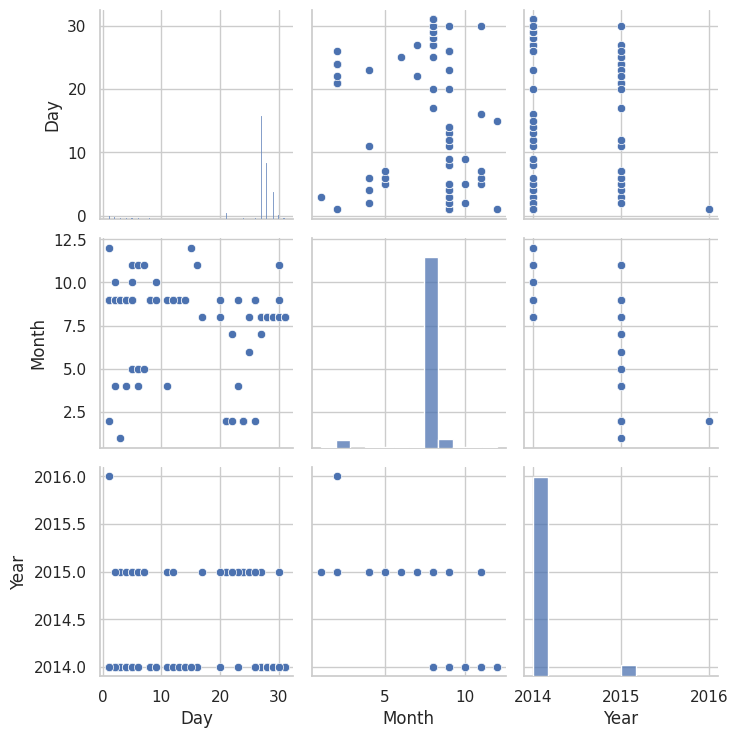

In [238]:
sns.pairplot(time_df)

The comment column has a high number of null values because it was optional for respondents. hence it will be droped.

The state and country columns will also be dropped due to a large number of null values and potential biases.

The timestamp column will be dropped as it contains irrelevant information for the analysis.

In [239]:
# droping unwanted columns which are unnecessary for EDA
df.drop(columns=['Timestamp', 'Country', 'state','comments'], inplace=True)

In [240]:
# check age column which has meaningless value filled
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72])

Some age values are negative and below 15, which need to be corrected as they are not legally allowed to work. So we will drop those rows whose age is below 15 and above 100

In [241]:
# Droping entire row of a respondant whose age is less than 16 and above 100
df.drop(df[df['Age'] < 16].index, inplace=True)
df.drop(df[df['Age'] > 100].index, inplace=True)
df['Age'].unique()

array([37, 44, 32, 31, 33, 35, 39, 42, 23, 29, 36, 27, 46, 41, 34, 30, 40,
       38, 50, 24, 18, 28, 26, 22, 19, 25, 45, 21, 43, 56, 60, 54, 55, 48,
       20, 57, 58, 47, 62, 51, 65, 49, 53, 61, 72])

In [242]:
# check for gender column
df['Gender'].unique()


array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'Enby', 'fluid',
       'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'Malr', 'femail',
       'Cis Man', 'ostensibly male, unsure what that really means'],
      dtype=object)

The gender column will be cleaned and combined into categories like Male, Female, and Other.

In [243]:
# Using condition and segregateing the data based on the condition
# Respondants filled gender column with their own words
# replace gender column to the more general form of male, female and others
male_list =['M','Male', 'male','m', 'Male-ish', 'maile',
            'Cis Male','Mal', 'Male (CIS)','Make','Male ', 'Man','msle',
            'Mail', 'cis male','Malr','Cis Man',]
df['Gender'].replace(male_list, 'Male', inplace=True)

In [244]:
female_list = ['Female','female','Cis Female', 'F','Woman', 'f',
               'Femake', 'woman','Female ','cis-female/femme','Female (cis)',
               'femail',]
df['Gender'].replace(female_list, 'Female', inplace=True)

In [245]:
others_list = ['Trans-female','something kinda male?','queer/she/they',
               'non-binary','Nah', 'Enby', 'fluid','Genderqueer',
               'Androgyne', 'Agender','Guy (-ish) ^_^', 'male leaning androgynous',
               'Trans woman','Neuter', 'Female (trans)','queer',
               'A little about you','ostensibly male, unsure what that really means']
df['Gender'].replace(others_list, 'Others', inplace=True)

In [246]:
df['Gender'].unique()

array(['Female', 'Male', 'Others'], dtype=object)

In [247]:
# check for null values in the dataframe
df_inst = dfi.Information(df)
df_inst.get_null_count()

{'self_employed': 18, 'work_interfere': 262}

Two columns, 'work_interfere' and 'self_employed,' contain null values, which will be filled with 'Don't Know' and 'NOT’  respectively.

In [248]:
# check for values filled in self_employed column
df['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [249]:
# self_employed column contains 18 null values
# fill all null values with "no"
df['self_employed'] = df['self_employed'].fillna('No')
df['self_employed'].unique()

array(['No', 'Yes'], dtype=object)

In [250]:
# check for values filled in work_intefere column
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [251]:
# self_employed column contains 262 null values
# fill all null values with "don't know"
df['work_interfere'] = df['work_interfere'].fillna("Don't Know")
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', "Don't Know"],
      dtype=object)

In [252]:
# check for value filled in every column after cleaning
df_inst.col_info()

Age : [37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49 53 61 72]

Gender : ['Female' 'Male' 'Others']

self_employed : ['No' 'Yes']

family_history : ['No' 'Yes']

treatment : ['Yes' 'No']

work_interfere : ['Often' 'Rarely' 'Never' 'Sometimes' "Don't Know"]

no_employees : ['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000']

remote_work : ['No' 'Yes']

tech_company : ['Yes' 'No']

benefits : ['Yes' "Don't know" 'No']

care_options : ['Not sure' 'No' 'Yes']

wellness_program : ['No' "Don't know" 'Yes']

seek_help : ['Yes' "Don't know" 'No']

anonymity : ['Yes' "Don't know" 'No']

leave : ['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy']

mental_health_consequence : ['No' 'Maybe' 'Yes']

phys_health_consequence : ['No' 'Yes' 'Maybe']

coworkers : ['Some of them' 'No' 'Yes']

supervisor : ['Yes' 'No' 'Some of them']

mental_health_interview : ['No' 'Yes' 'Maybe']

phys

After handling the null values, irrelevant columns, and rows, the data will be prepared for further processing.

In [253]:
# uploading dataframe to numpy and representing in matrix form
arr = df.to_numpy()
arr

array([[37, 'Female', 'No', ..., 'Maybe', 'Yes', 'No'],
       [44, 'Male', 'No', ..., 'No', "Don't know", 'No'],
       [32, 'Male', 'No', ..., 'Yes', 'No', 'No'],
       ...,
       [34, 'Male', 'No', ..., 'No', 'No', 'No'],
       [46, 'Female', 'No', ..., 'No', 'No', 'No'],
       [25, 'Male', 'No', ..., 'No', "Don't know", 'No']], dtype=object)

In [254]:
# select a slice or part of the data and display
df.iloc[0:15 , 4:9]

,treatment,work_interfere,no_employees,remote_work,tech_company
0,Yes,Often,6-25,No,Yes
1,No,Rarely,More than 1000,No,No
2,No,Rarely,6-25,No,Yes
3,Yes,Often,26-100,No,Yes
4,No,Never,100-500,Yes,Yes
5,No,Sometimes,6-25,No,Yes
6,Yes,Sometimes,1-5,Yes,Yes
7,No,Never,1-5,Yes,Yes
8,Yes,Sometimes,100-500,No,Yes
9,No,Never,26-100,No,Yes


In [255]:
# let's plot Heatmap for finding the correlation between the features
hp_df = df
hp_df['treatment'].value_counts()

Yes    632
No     619
Name: treatment, dtype: int64

As we observe most of the columns except 'Age' consist of values 'yes','No','maybe' and etc. we have to encode them to represent in Heatmap

In [256]:
# Label Encoding the categorical variables
from sklearn.preprocessing import LabelEncoder
otype_col =['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

label_encoder = LabelEncoder()
for col in otype_col:
  label_encoder.fit(hp_df[col])
  hp_df[col] = label_encoder.transform(hp_df[col])

In [257]:
hp_df['treatment'].value_counts()
# after encoding our column looks like below

1    632
0    619
Name: treatment, dtype: int64

<Axes: >

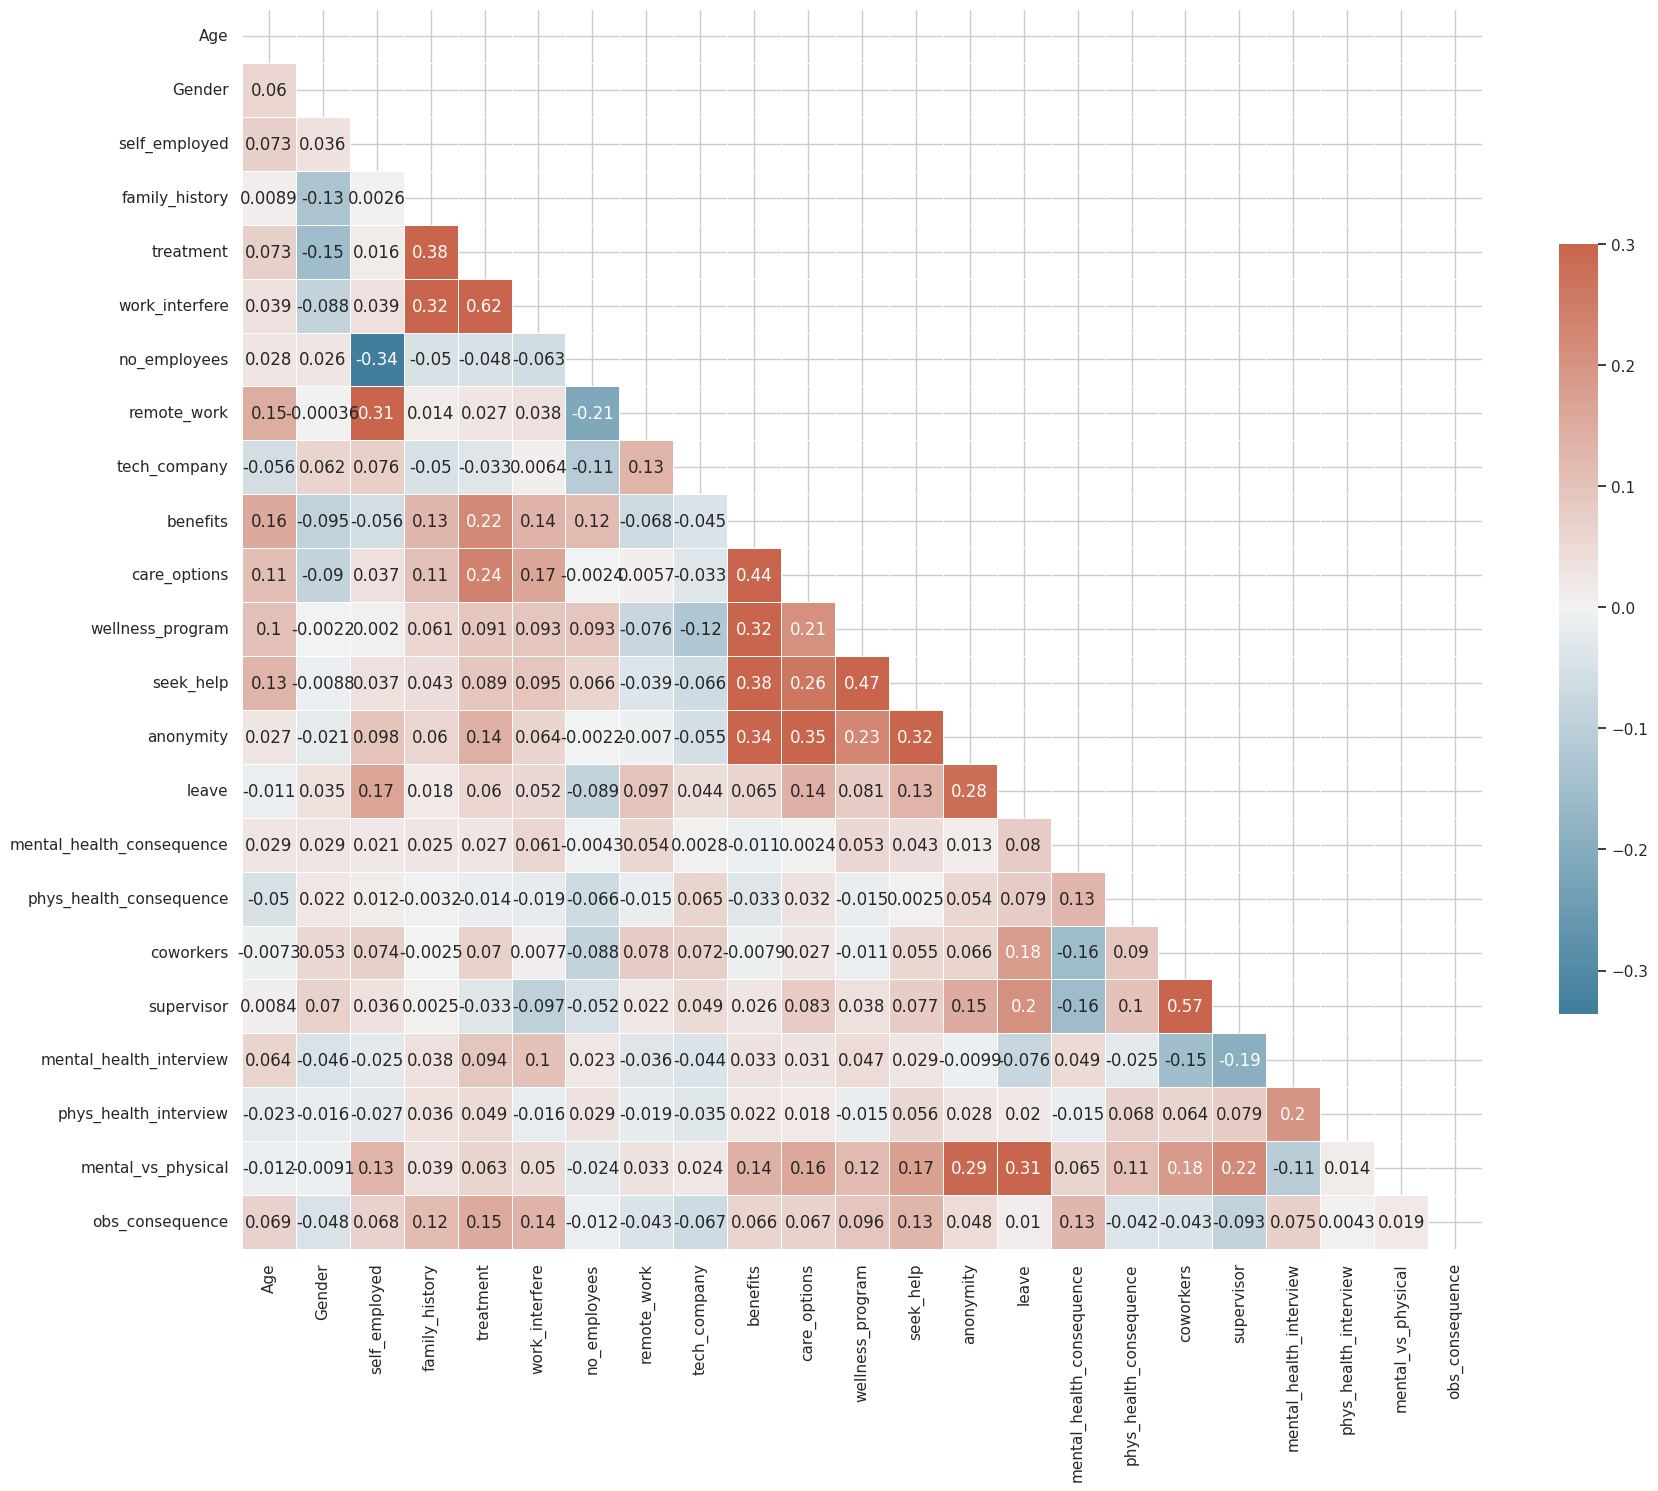

In [258]:
# ploting a heatmap and trying to understand the correlation of various features with the target variable
# compute the correlation matrix
corr = hp_df.corr()
f, ax = plt.subplots(figsize=(20,20))

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230,20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap,vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<Axes: xlabel='Age', ylabel='treatment'>

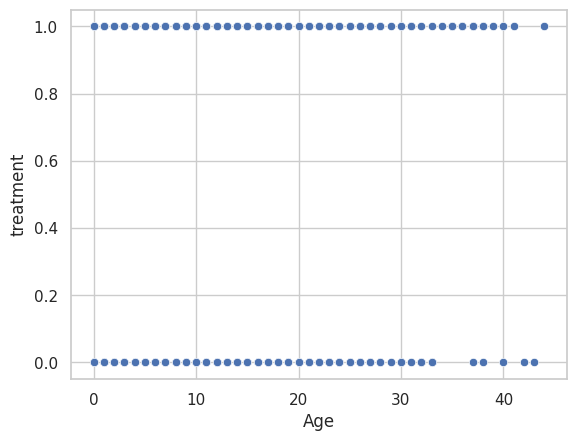

In [259]:
# Using scatter plot to show the relationship between 'Age' and 'treatment'.
sns.set(style='whitegrid')

sns.scatterplot(x='Age', y='treatment', data=df)

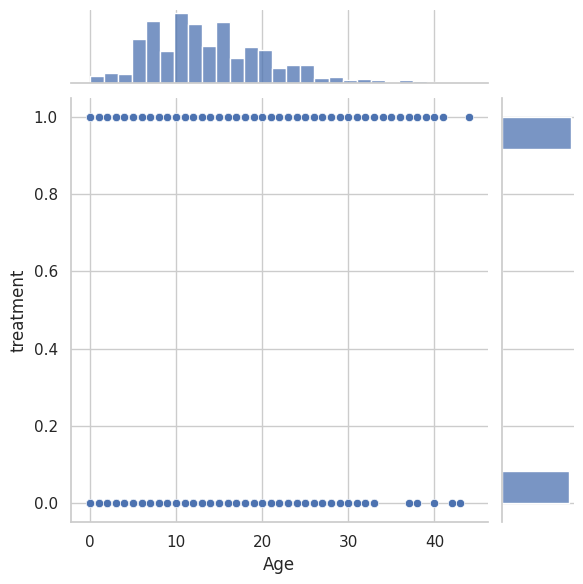

In [260]:
sns.set(style='whitegrid')

sns.jointplot(x='Age', y='treatment', data=df)